# Analysis of Population Data

Data used in this notebook (onedrive link to each files):

1. Curated Population data: https://unimelbcloud-my.sharepoint.com/:u:/r/personal/eamanda_student_unimelb_edu_au/Documents/Applied%20Data%20Science%20Datasets/landing/raw/cleaned/curated/pop_growth/population_data_w_components/population_data.gpkg?csf=1&web=1&e=L8UFFB


In [1]:
# Libraries
import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import numpy as np
from pathlib import Path
import statsmodels.api as sm
import seaborn as sns

### Correlation

In [2]:
pop_df = gpd.read_file("../datasets/raw/curated/population_data.gpkg")

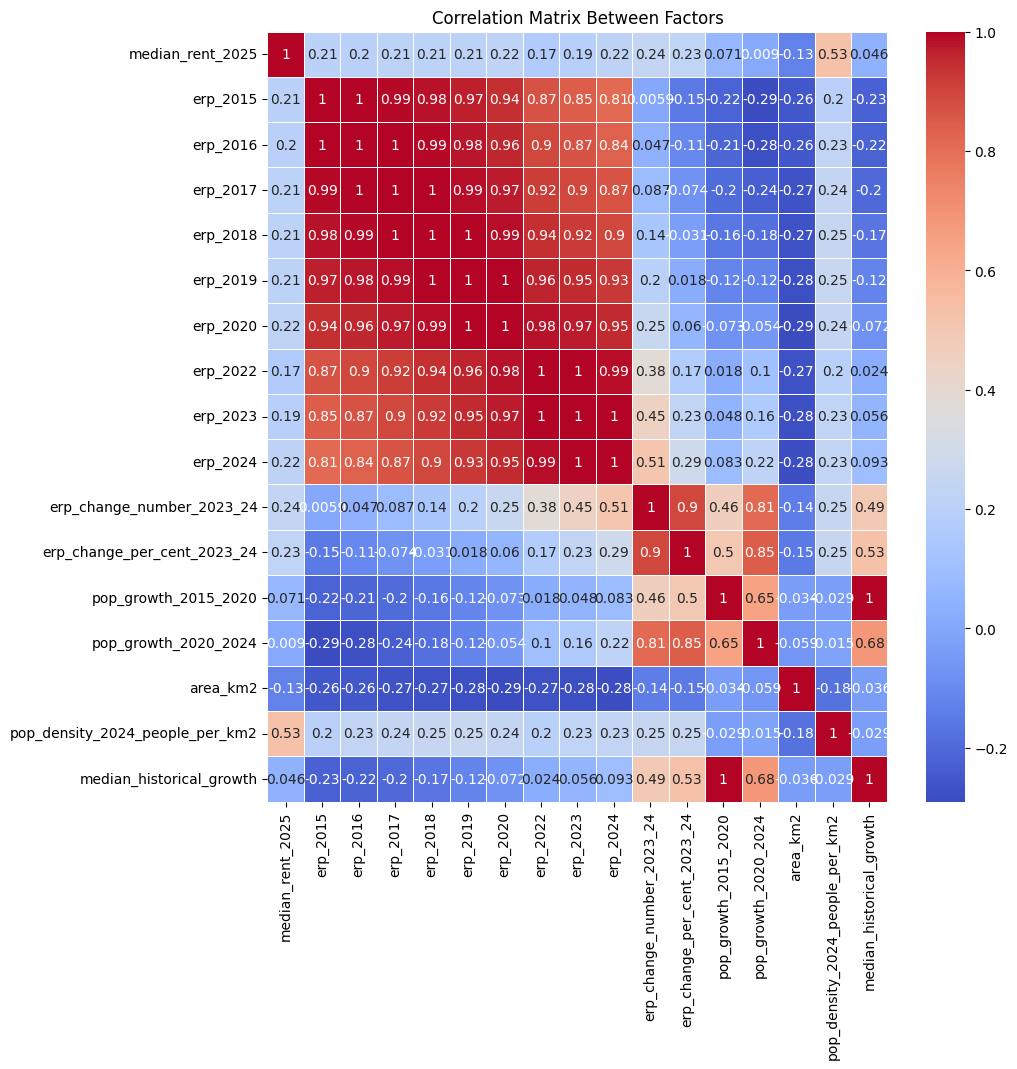

In [ ]:
# Subset: ERP
columns_of_interest = ['median_rent_2025', 'erp_2015','erp_2016', 'erp_2017', 'erp_2018', 'erp_2019', 'erp_2020', 'erp_2022', 'erp_2023', 'erp_2024', 'erp_change_number_2023_24', 'erp_change_per_cent_2023_24','pop_growth_2015_2020', 'pop_growth_2020_2024', 'area_km2','pop_density_2024_people_per_km2', 'median_historical_growth']

# Filter out the relevant numeric data
df_numeric = pop_df[columns_of_interest]

# Create the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Between Factors')
plt.show()

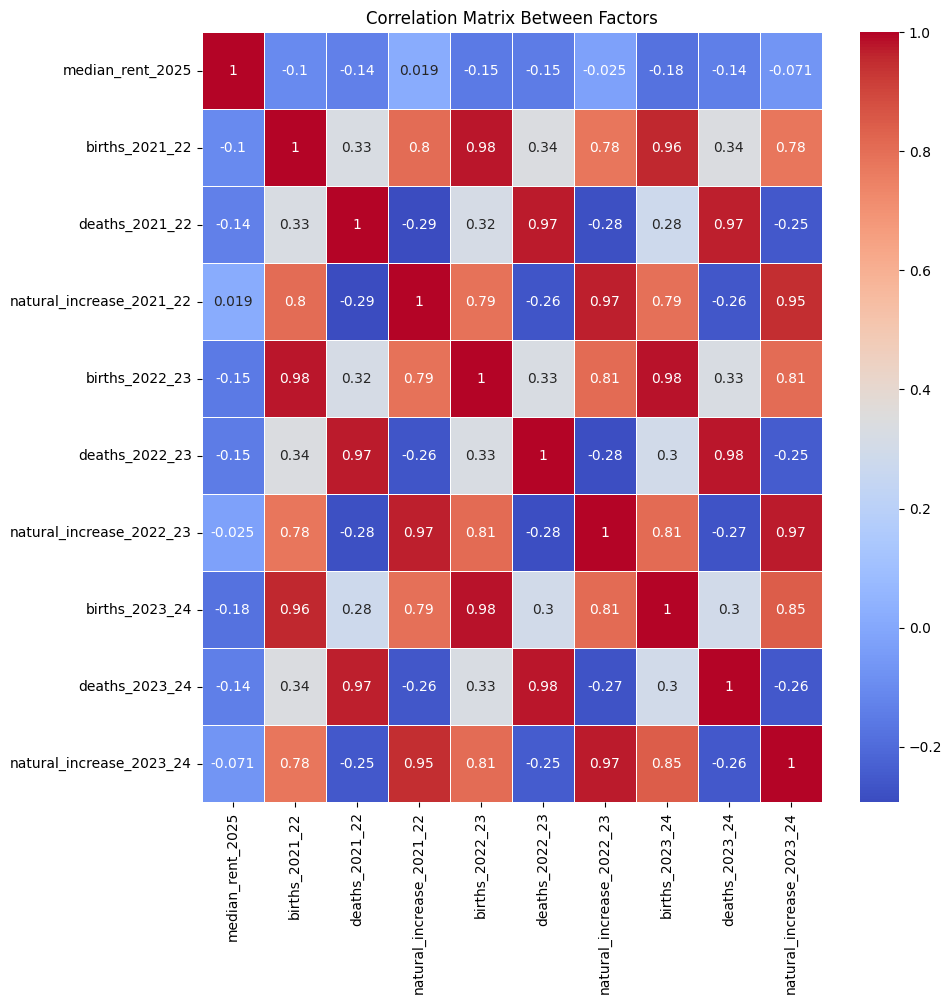

In [ ]:
# Subset: Natural population change (births & deaths)
columns_of_interest = ['median_rent_2025', 'births_2021_22', 'deaths_2021_22', 'natural_increase_2021_22',
                'births_2022_23', 'deaths_2022_23', 'natural_increase_2022_23',
                'births_2023_24', 'deaths_2023_24', 'natural_increase_2023_24']


df_numeric = pop_df[columns_of_interest]


corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Between Factors')
plt.show()

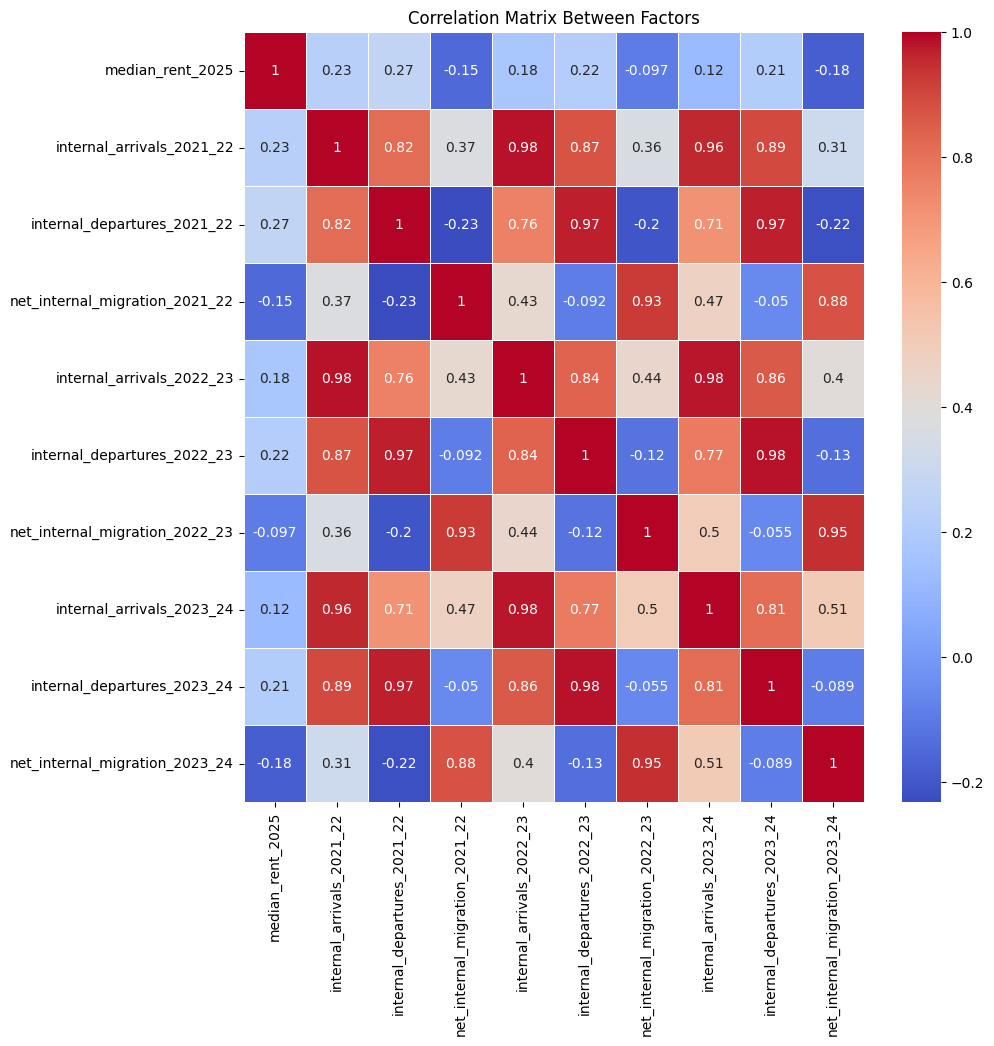

In [ ]:
# Subset: Internal migration
columns_of_interest = ['median_rent_2025', 'internal_arrivals_2021_22', 'internal_departures_2021_22', 'net_internal_migration_2021_22',
                 'internal_arrivals_2022_23', 'internal_departures_2022_23', 'net_internal_migration_2022_23',
                 'internal_arrivals_2023_24', 'internal_departures_2023_24', 'net_internal_migration_2023_24']



df_numeric = pop_df[columns_of_interest]


corr_matrix = df_numeric.corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Between Factors')
plt.show()

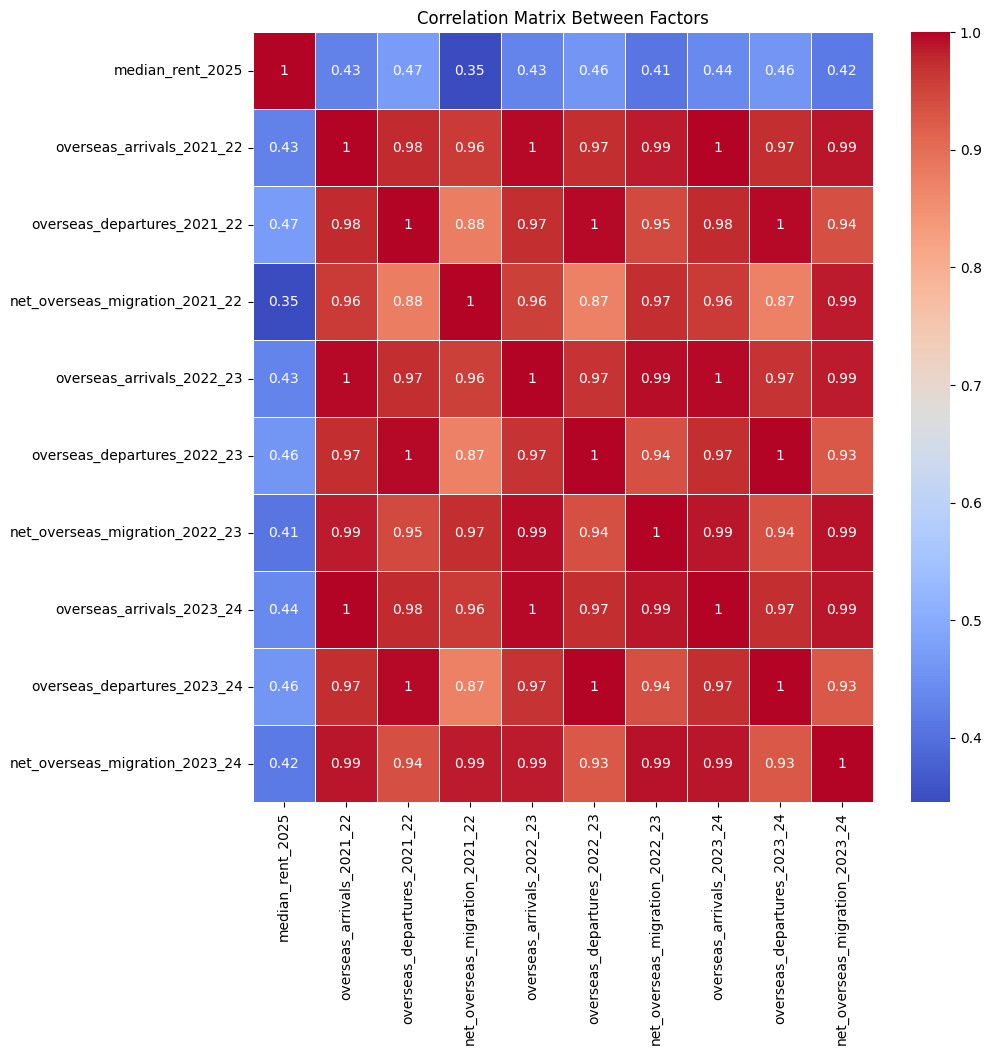

In [7]:
# Subset: Overseas migration
columns_of_interest = ['median_rent_2025', 'overseas_arrivals_2021_22', 'overseas_departures_2021_22', 'net_overseas_migration_2021_22',
                 'overseas_arrivals_2022_23', 'overseas_departures_2022_23', 'net_overseas_migration_2022_23',
                 'overseas_arrivals_2023_24', 'overseas_departures_2023_24', 'net_overseas_migration_2023_24']


df_numeric = pop_df[columns_of_interest]

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Between Factors')
plt.show()

In [10]:
cols = [
    'erp_2015', 'erp_2016', 'erp_2017', 'erp_2018', 'erp_2019', 'erp_2020',
    'erp_2021', 'erp_2022', 'erp_2023', 'erp_2024',
    'erp_change_number_2023_24', 'erp_change_per_cent_2023_24',
    'area_km2',
    'pop_density_2024_people_per_km2',
    'births_2021_22', 'deaths_2021_22', 'natural_increase_2021_22',
    'internal_arrivals_2021_22', 'internal_departures_2021_22',
    'net_internal_migration_2021_22', 'overseas_arrivals_2021_22',
    'overseas_departures_2021_22', 'net_overseas_migration_2021_22',
    'births_2022_23', 'deaths_2022_23', 'natural_increase_2022_23',
    'internal_arrivals_2022_23', 'internal_departures_2022_23',
    'net_internal_migration_2022_23', 'overseas_arrivals_2022_23',
    'overseas_departures_2022_23', 'net_overseas_migration_2022_23',
    'births_2023_24', 'deaths_2023_24', 'natural_increase_2023_24',
    'internal_arrivals_2023_24', 'internal_departures_2023_24',
    'net_internal_migration_2023_24', 'overseas_arrivals_2023_24',
    'overseas_departures_2023_24', 'net_overseas_migration_2023_24',
    'erp_2026', 'erp_2031', 'erp_2036',
    'pnpd_2021', 'pnpd_2026', 'pnpd_2031', 'pnpd_2036',
    'popd_2021', 'popd_2026', 'popd_2031', 'popd_2036',
    'opd_2021', 'opd_2026', 'opd_2031', 'opd_2036',
    'hhs_2021', 'hhs_2026', 'hhs_2031', 'hhs_2036',
    'spd_2021', 'spd_2026', 'spd_2031', 'spd_2036',
    'occ_2021', 'occ_2026', 'occ_2031', 'occ_2036',
    'pop_growth_2015_2020', 'pop_growth_2020_2024',
    'pop_growth_2021_2026', 'pop_growth_2026_2031', 'pop_growth_2031_2036',
    'median_projected_growth', 'median_historical_growth', 'median_rent_2025'
]


subset = pop_df[cols]

corr_matrix = subset.corr()

corr_matrix

,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,erp_2023,erp_2024,...,occ_2031,occ_2036,pop_growth_2015_2020,pop_growth_2020_2024,pop_growth_2021_2026,pop_growth_2026_2031,pop_growth_2031_2036,median_projected_growth,median_historical_growth,median_rent_2025
erp_2015,1.000000,0.998019,0.992638,0.983002,0.966988,0.944214,0.908959,0.872610,0.846484,0.814560,...,0.292678,0.296119,-0.218538,-0.290408,-0.216695,-0.193920,-0.126686,-0.192900,-0.227335,0.207261
erp_2016,0.998019,1.000000,0.997986,0.991592,0.978979,0.958671,0.925528,0.895742,0.872669,0.838329,...,0.354080,0.356826,-0.214769,-0.275725,-0.203967,-0.173486,-0.094753,-0.169064,-0.220775,0.203103
erp_2017,0.992638,0.997986,1.000000,0.997620,0.989185,0.973242,0.944193,0.917684,0.897212,0.865963,...,0.358256,0.361083,-0.196738,-0.237065,-0.187577,-0.150534,-0.065926,-0.145932,-0.201216,0.209598
erp_2018,0.983002,0.991592,0.997620,1.000000,0.996813,0.986433,0.963220,0.941079,0.923772,0.896573,...,0.363128,0.366036,-0.162179,-0.184407,-0.164911,-0.119051,-0.029106,-0.114343,-0.165094,0.211332
erp_2019,0.966988,0.978979,0.989185,0.996813,1.000000,0.996340,0.980598,0.963811,0.950062,0.927549,...,0.367581,0.370567,-0.118255,-0.121676,-0.137929,-0.081035,0.013855,-0.076272,-0.119478,0.211559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop_growth_2026_2031,-0.193920,-0.173486,-0.150534,-0.119051,-0.081035,-0.040117,0.003665,0.050478,0.087546,0.125340,...,0.089168,0.090760,0.398970,0.583695,0.896460,1.000000,0.844729,0.998049,0.418236,0.043668
pop_growth_2031_2036,-0.126686,-0.094753,-0.065926,-0.029106,0.013855,0.055177,0.100186,0.154590,0.196721,0.235421,...,0.135526,0.138113,0.379591,0.635814,0.672650,0.844729,1.000000,0.841866,0.402608,-0.001124
median_projected_growth,-0.192900,-0.169064,-0.145932,-0.114343,-0.076272,-0.038095,0.005360,0.054763,0.092267,0.128495,...,0.087673,0.089283,0.402368,0.587688,0.903087,0.998049,0.841866,1.000000,0.421739,0.052470
median_historical_growth,-0.227335,-0.220775,-0.201216,-0.165094,-0.119478,-0.072336,-0.021767,0.023769,0.055612,0.092856,...,0.038435,0.038703,0.998929,0.684014,0.435925,0.418236,0.402608,0.421739,1.000000,0.046140
